In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
length_seconds = 4;

# Sample rate (samples per second).
sample_rate = 48000;
length = length_seconds * sample_rate;

# The frequency of our sine wave. Should be able to hear 1000 to 10000 Hz.
frequency = 1000;

In [3]:
# Create array of time samples.
t = np.linspace(0, length_seconds, length, endpoint=False)

# Sample a sin wave.
x = np.sin(2 * np.pi * frequency * t)

In [4]:
# Play the clip.
ipd.Audio(x, rate=sample_rate)

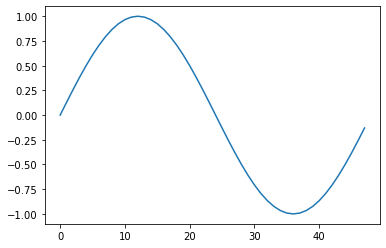

In [5]:
# Plot one period of sin wave.
plt.plot(x[0:int(sample_rate/frequency)])

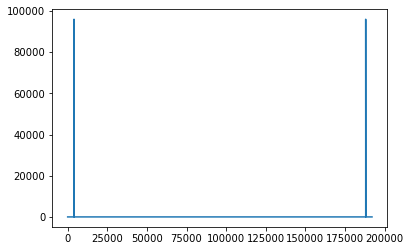

In [6]:
# Compute the 1D DFT
f = np.fft.fft(x)

# Plot the 1D DFT
plt.plot(abs(f))

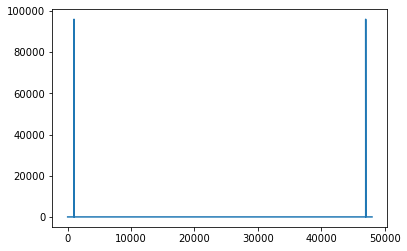

In [7]:
# Now with correctly labeled frequency axis.
f_axis = np.linspace(0, sample_rate, length, endpoint=False)
plt.plot(f_axis, abs(f))

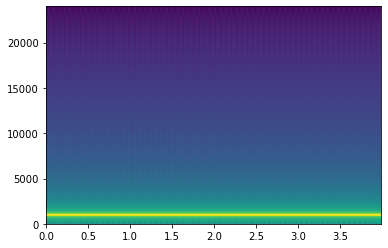

In [8]:
# Compute spectrogram.
spectrogram, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sample_rate, noverlap=0)

In [9]:
print(type(spectrogram))
print(spectrogram.ndim)
print(spectrogram.shape)

<class 'numpy.ndarray'>
2
(513, 187)


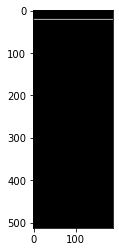

In [10]:
# Display spectrogram as a grayscale image.
plt.imshow(spectrogram,cmap='gray')

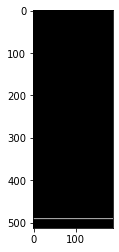

In [11]:
# Flip it vertically.
spectrogram = np.flip(spectrogram, 0)
plt.imshow(spectrogram,cmap='gray')


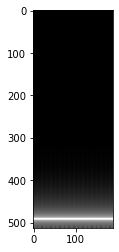

In [12]:
# Compute log_10 of spectrogram. Add eps to make sure don't take log of 0.
spectrogram_log = np.log10( spectrogram + np.finfo(float).eps)
plt.imshow(spectrogram_log,cmap='gray')

In [13]:
# Normalize so values range from 0 to 1.
print(np.amin(spectrogram_log))
print(np.amax(spectrogram_log))
spectrogram_log = (spectrogram_log - np.amin(spectrogram_log)) / (np.amax(spectrogram_log) - np.amin(spectrogram_log))
print(np.amin(spectrogram_log))
print(np.amax(spectrogram_log))

-15.653559156759714
-2.2110514212669363
0.0
1.0


In [16]:
plt.imsave('one_sine_spect.png', spectrogram_log, cmap='gray')